# Visualizing Features

In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.INFO)
print(eKonf.__version__)

0.1.32+22.g1490fd9.dirty


In [2]:
data_dir = "../data/fomc"

## Build and load a feature set

In [9]:
cfg = eKonf.compose("dataset=feature_build")
cfg.name = "fomc_features_small"
cfg.data_dir = data_dir
cfg.data_file = "econ_train_small.parquet"
cfg.force.build = True
cfg.pipeline.split_sampling.stratify_on = "target"
cfg.pipeline.split_sampling.random_state = 123
cfg.pipeline.split_sampling.test_size = 0.25
cfg.pipeline.reset_index.index_column_name = "date"
cfg.column_info.columns.index = "index"
cfg.column_info.columns.id = "date"
cfg.column_info.columns.x = [
    "prev_decision",
    "GDP_diff_prev",
    "PMI",
    "EMP_diff_prev",
    "RSALES_diff_year",
    "UNEMP_diff_prev",
    "HSALES_diff_year",
    "Inertia_diff",
    "Balanced_diff",
]
cfg.column_info.columns.y = "target"
f_small = eKonf.instantiate(cfg)
f_small.persist()

INFO:ekorpkit.pipelines.pipe:Applying pipeline: OrderedDict([('load_dataframe', 'load_dataframe'), ('reset_index', 'reset_index'), ('split_sampling', 'split_sampling')])
INFO:ekorpkit.ekonf:Applying pipe: functools.partial(<function load_dataframe at 0x7fd4706e8310>)
INFO:ekorpkit.io.file:Processing [1] files from ['econ_train_small.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['../data/fomc/econ_train_small.parquet']
INFO:ekorpkit.io.file:Loading data from ../data/fomc/econ_train_small.parquet
INFO:ekorpkit.ekonf:Applying pipe: functools.partial(<function reset_index at 0x7fd4706e7670>)
INFO:ekorpkit.ekonf:Applying pipe: functools.partial(<function split_sampling at 0x7fd4706e7280>)
INFO:ekorpkit.io.file:Saving dataframe to ../data/fomc/fomc_features_small/fomc_features_small-train.parquet
INFO:ekorpkit.io.file:Saving dataframe to ../data/fomc/fomc_features_small/fomc_features_small-test.parquet
INFO:ekorpkit.datasets.feature:Dataset fomc_features_small built with 415 row

In [11]:
f_small.train_data

,date,target,prev_decision,GDP_diff_prev,PMI,EMP_diff_prev,RSALES_diff_year,UNEMP_diff_prev,HSALES_diff_year,Inertia_diff,Balanced_diff,split
index,,,,,,,,,,,,
0,2002-09-24,Hold,0.0,0.615502,50.3,-0.002297,2.206995,-1.724138,17.090069,0.0,0.0,train
1,1997-03-25,Hike,0.0,1.038398,53.1,0.257080,3.197859,-1.886792,4.161248,0.0,0.0,train
2,2011-04-27,Hold,0.0,0.519595,59.1,0.179317,4.107119,0.000000,-21.259843,0.0,0.0,train
3,1989-02-08,Hike,1.0,1.332501,54.7,0.246029,2.094256,1.886792,22.905983,0.0,0.0,train
4,2008-09-16,Hold,0.0,0.572295,49.2,-0.202195,-4.803606,5.172414,-37.768240,0.0,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
306,1998-08-18,Hold,0.0,0.925821,49.2,0.102319,2.026188,0.000000,8.819876,0.0,0.0,train
307,2021-04-28,Hold,0.0,1.115277,63.7,0.489818,26.945039,-3.225806,44.426230,0.0,0.0,train
308,2004-01-28,Hold,0.0,1.666896,60.1,0.087374,2.493088,-1.724138,7.729008,0.0,0.0,train


In [9]:
cfg = eKonf.compose(config_group="dataset=feature")
cfg.name = "fomc_features_small"
cfg.data_dir = data_dir
f_small = eKonf.instantiate(cfg)

In [10]:
f_small.INFO

{'splits': {'train': {'data_file': 'fomc_features_small-train.parquet',
   'name': 'train',
   'num_examples': 311,
   'num_bytes': 63207,
   'human_bytes': '61.73 KiB'},
  'test': {'data_file': 'fomc_features_small-test.parquet',
   'name': 'test',
   'num_examples': 104,
   'num_bytes': 21118,
   'human_bytes': '20.62 KiB'}},
 'num_examples': 415,
 'size_in_bytes': 84325,
 'size_in_human_bytes': '82.35 KiB',
 'data_files': {'train': 'fomc_features_small-train.parquet',
  'test': 'fomc_features_small-test.parquet'},
 'meta_files': {},
 'data_files_modified': '2022-06-14 10:23:24',
 'info_updated': '2022-06-14 10:23:24',
 'column_info': {'_keys_': {'index': 'index',
   'id': 'id',
   'x': 'x',
   'y': 'y',
   'split': 'split',
   'dataset': 'dataset'},
  'columns': {'index': 'date',
   'id': ['date', 'split'],
   'x': ['prev_decision',
    'GDP_diff_prev',
    'PMI',
    'EMP_diff_prev',
    'RSALES_diff_year',
    'UNEMP_diff_prev',
    'HSALES_diff_year',
    'Inertia_diff',
    'Bal

In [7]:
y_train = f_small.y_train
print(f_small.COLUMN.Y)
y_train[:5]

target


date
0    Hold
1    Hold
2    Hold
3     Cut
4     Cut
Name: target, dtype: object

In [7]:
X_train = f_small.X_train
print(f_small.COLUMN.X)
X_train[:5]

['prev_decision', 'GDP_diff_prev', 'PMI', 'EMP_diff_prev', 'RSALES_diff_year', 'UNEMP_diff_prev', 'HSALES_diff_year', 'Inertia_diff', 'Balanced_diff']


,prev_decision,GDP_diff_prev,PMI,EMP_diff_prev,RSALES_diff_year,UNEMP_diff_prev,HSALES_diff_year,Inertia_diff,Balanced_diff
date,,,,,,,,,
0,0.0,7.547535,57.7,0.234047,3.055276,-2.898551,22.622478,0.0,0.0
1,0.0,0.843712,51.9,0.058919,0.196754,-2.173913,-21.960415,0.0,0.0
2,1.0,0.364447,54.7,0.221891,4.213922,-5.000000,-8.387800,0.0,0.0
3,-1.0,0.743327,51.2,0.124735,2.094256,-4.285714,13.643411,0.0,0.0
4,0.0,1.284129,56.1,0.221892,3.239959,-3.278689,16.625310,0.0,0.0


In [5]:
cfg = eKonf.compose("dataset=feature_build")
cfg.name = "fomc_features_large"
cfg.data_dir = data_dir
cfg.data_file = "econ_train_large.parquet"
cfg.force.rebuild = True
cfg.pipeline.split_sampling.stratify_on = "target"
cfg.pipeline.split_sampling.random_state = 123
cfg.pipeline.split_sampling.test_size = 0.25
cfg.pipeline.reset_index.index_column_name = "date"
cfg.column_info.columns.index = "date"
cfg.column_info.columns.id = "index"
cfg.column_info.columns.x = [
    "prev_decision",
    "GDP_diff_prev",
    "GDP_diff_year",
    "GDPPOT_diff_prev",
    "GDPPOT_diff_year",
    "PCE_diff_prev",
    "PCE_diff_year",
    "CPI_diff_prev",
    "CPI_diff_year",
    "UNEMP",
    "UNEMP_diff_prev",
    "UNEMP_diff_year",
    "EMP",
    "EMP_diff_prev",
    "EMP_diff_year",
    "PMI",
    "PMI_diff_prev",
    "PMI_diff_year",
    "RSALES_diff_prev",
    "RSALES_diff_year",
    "HSALES_diff_prev",
    "HSALES_diff_year",
    "Taylor-Rate",
    "Balanced-Rate",
    "Inertia-Rate",
    "Taylor_diff",
    "Balanced_diff",
    "Inertia_diff",
]
cfg.column_info.columns.y = "target"
cfg.verbose = False
f_large = eKonf.instantiate(cfg)
f_large.persist()

## Visualize Features

In [3]:
cfg = eKonf.compose(config_group="dataset=feature")
cfg.name = "fomc_features_small"
cfg.data_dir = data_dir
f_small = eKonf.instantiate(cfg)
f_small.train_data.head()

,date,target,prev_decision,GDP_diff_prev,PMI,EMP_diff_prev,RSALES_diff_year,UNEMP_diff_prev,HSALES_diff_year,Inertia_diff,Balanced_diff,split
date,,,,,,,,,,,,
0,2002-09-24,Hold,0.0,0.615502,50.3,-0.002297,2.206995,-1.724138,17.090069,0.0,0.0,train
1,1997-03-25,Hike,0.0,1.038398,53.1,0.257080,3.197859,-1.886792,4.161248,0.0,0.0,train
2,2011-04-27,Hold,0.0,0.519595,59.1,0.179317,4.107119,0.000000,-21.259843,0.0,0.0,train
3,1989-02-08,Hike,1.0,1.332501,54.7,0.246029,2.094256,1.886792,22.905983,0.0,0.0,train
4,2008-09-16,Hold,0.0,0.572295,49.2,-0.202195,-4.803606,5.172414,-37.768240,0.0,0.0,train


In [4]:
f_small.y_train = f_small.transform_labels(f_small.y_train)
f_small.y_dev = f_small.transform_labels(f_small.y_dev)
f_small.y_test = f_small.transform_labels(f_small.y_test)

In [5]:
X_cols = f_small.COLUMN.X
y_col = f_small.COLUMN.Y
print(f_small.classes, X_cols, y_col)

['Cut', 'Hike', 'Hold'] ['prev_decision', 'GDP_diff_prev', 'PMI', 'EMP_diff_prev', 'RSALES_diff_year', 'UNEMP_diff_prev', 'HSALES_diff_year', 'Inertia_diff', 'Balanced_diff'] target


In [6]:
f_small.train_data.head()

,date,target,prev_decision,GDP_diff_prev,PMI,EMP_diff_prev,RSALES_diff_year,UNEMP_diff_prev,HSALES_diff_year,Inertia_diff,Balanced_diff,split
date,,,,,,,,,,,,
0,2002-09-24,2,0.0,0.615502,50.3,-0.002297,2.206995,-1.724138,17.090069,0.0,0.0,train
1,1997-03-25,1,0.0,1.038398,53.1,0.257080,3.197859,-1.886792,4.161248,0.0,0.0,train
2,2011-04-27,2,0.0,0.519595,59.1,0.179317,4.107119,0.000000,-21.259843,0.0,0.0,train
3,1989-02-08,1,1.0,1.332501,54.7,0.246029,2.094256,1.886792,22.905983,0.0,0.0,train
4,2008-09-16,2,0.0,0.572295,49.2,-0.202195,-4.803606,5.172414,-37.768240,0.0,0.0,train


In [7]:
# cfg = eKonf.compose(config_group="visualize/plot=radviz")
# cfg.plots[0].x = X_cols
# cfg.plots[0].y = y_col
# cfg.plots[0].classes = f_small.classes
# cfg.figure.figsize = (10, 6)
# cfg.figure.fontsize = 14
# eKonf.instantiate(cfg, data=f_small.data)

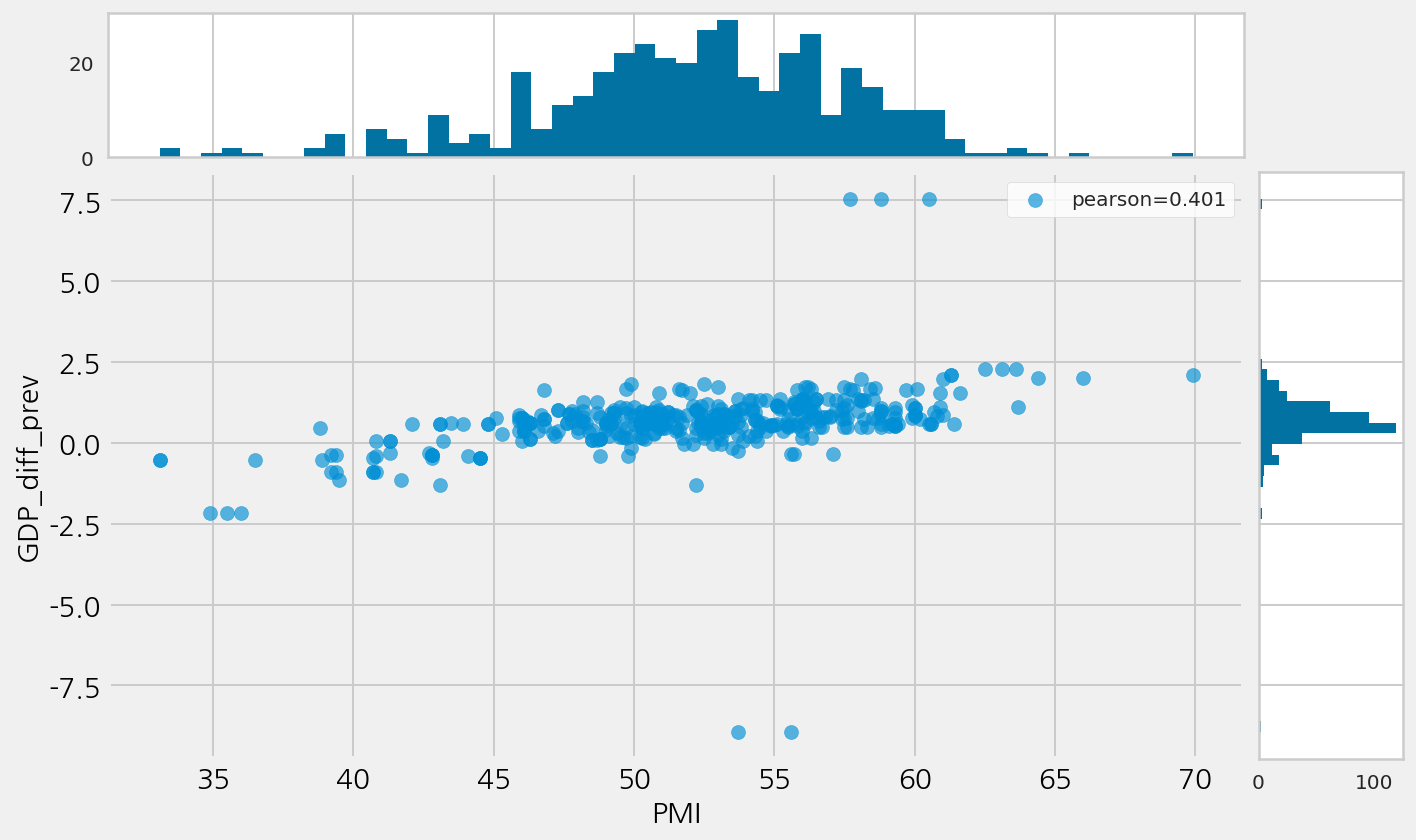

In [7]:
cfg = eKonf.compose(config_group="visualize/plot=jointplot")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.plots[0].columns = ["PMI", "GDP_diff_prev"]
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)

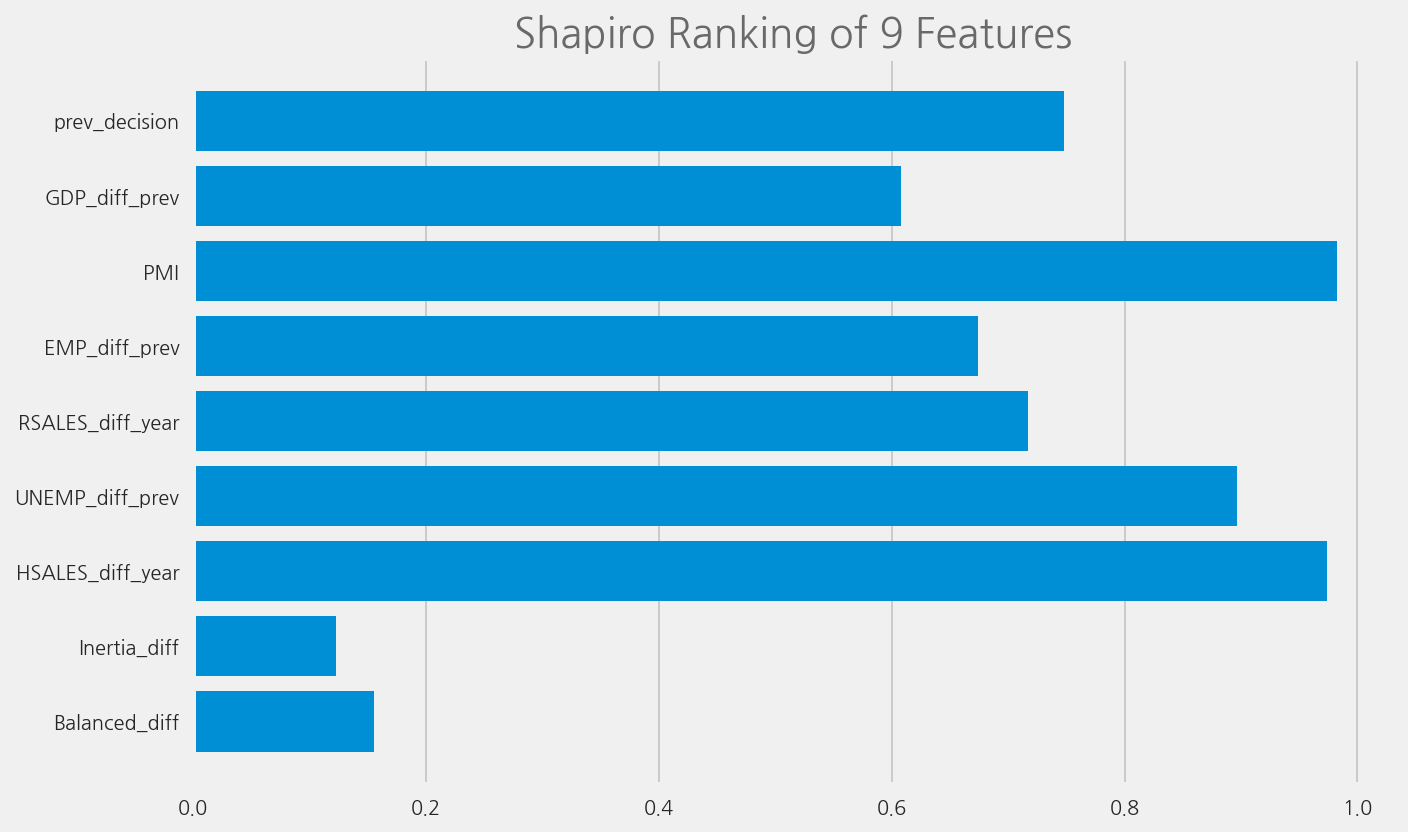

In [8]:
cfg = eKonf.compose(config_group="visualize/plot=rank1d")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.plots[0].classes = f_small.classes
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)

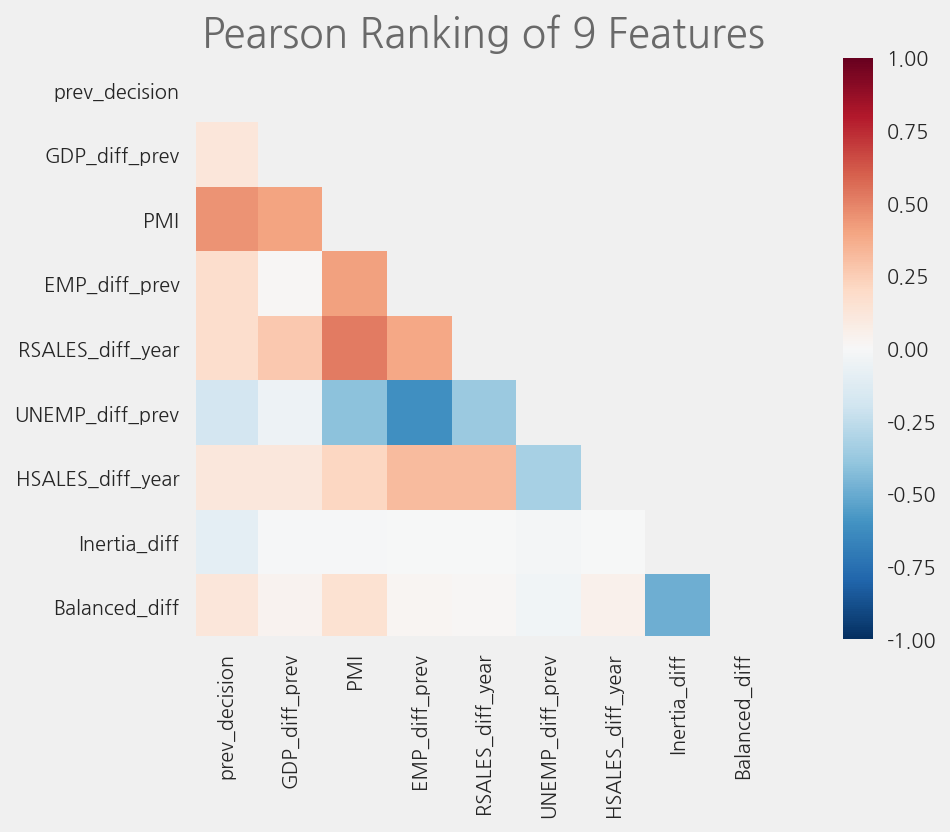

In [9]:
cfg = eKonf.compose(config_group="visualize/plot=rank2d")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)

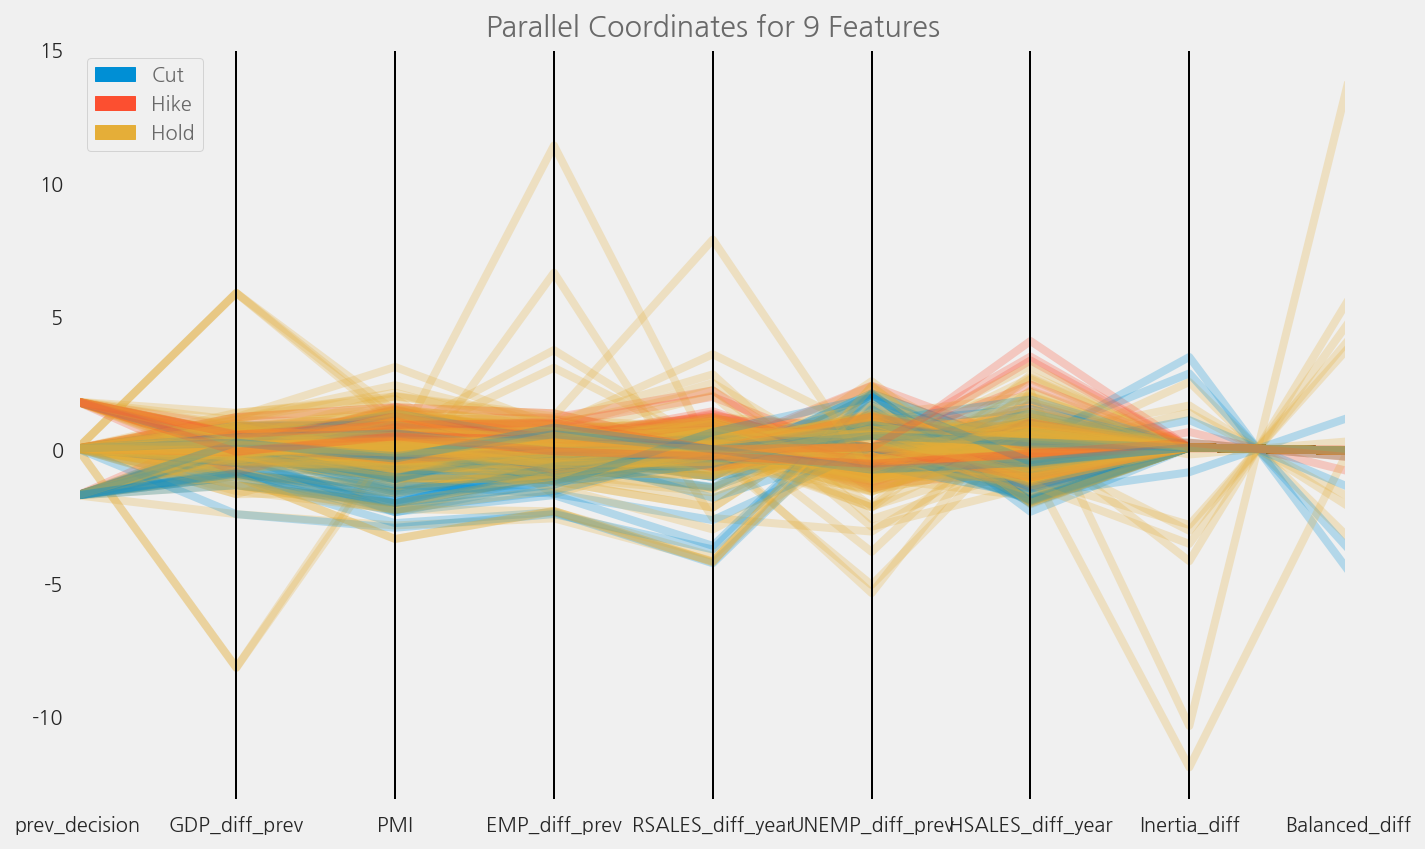

In [10]:
cfg = eKonf.compose("visualize/plot=pcoords")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.plots[0].classes = f_small.classes
cfg.plots[0].sample = 0.8
cfg.plots[0].shuffle = False
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 10
eKonf.instantiate(cfg, data=f_small.data)

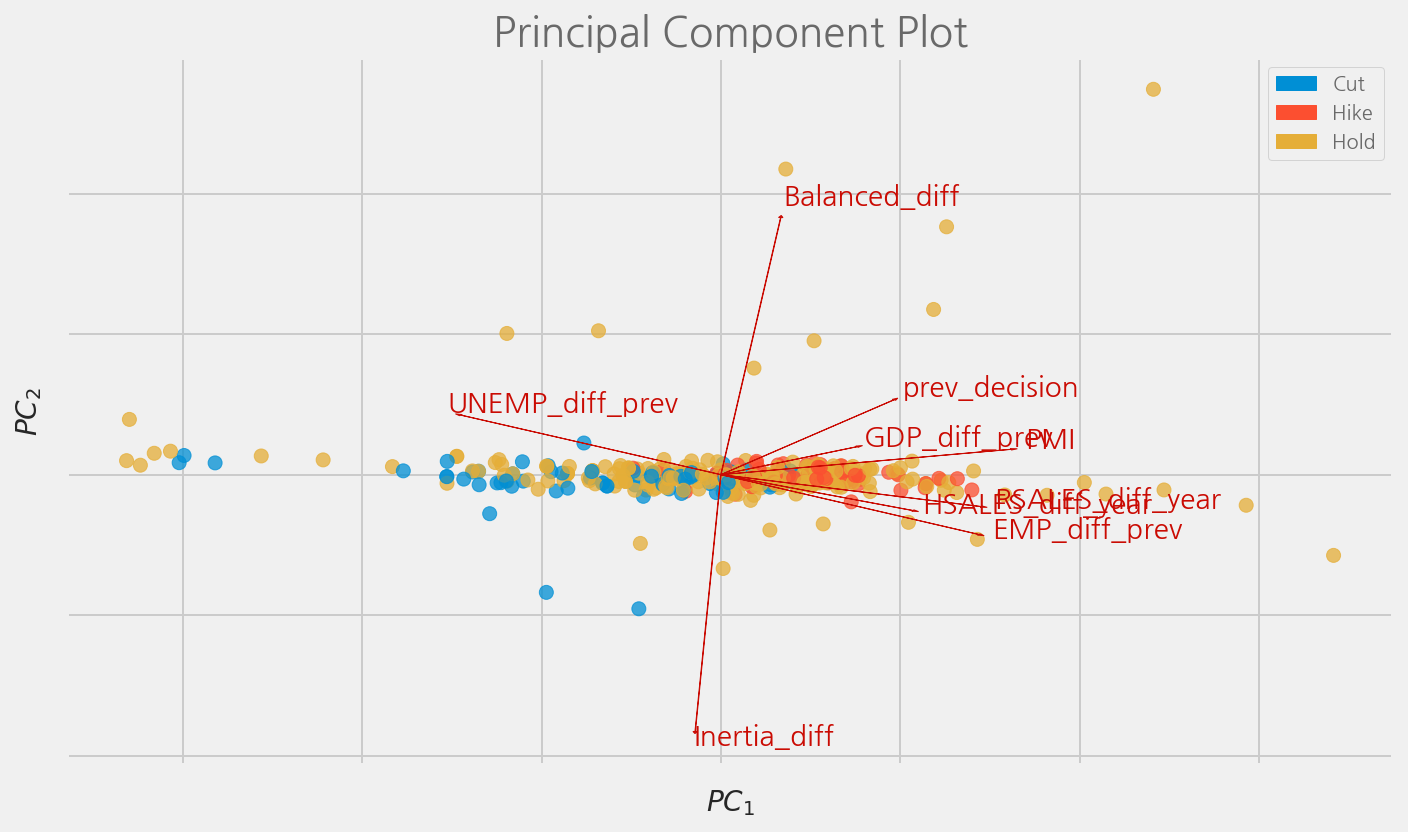

In [11]:
cfg = eKonf.compose(config_group="visualize/plot=pca")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.plots[0].classes = f_small.classes
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)

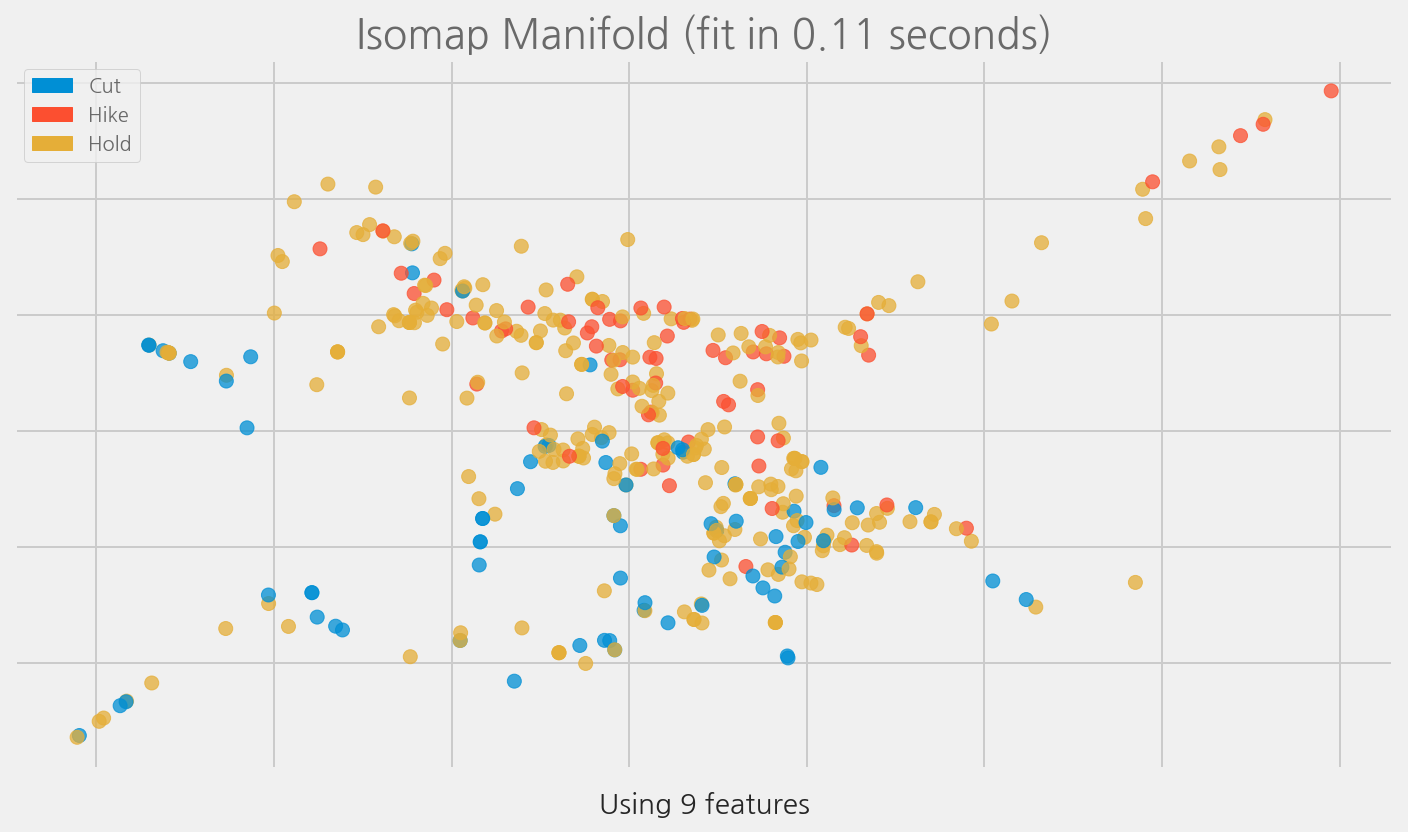

In [12]:
cfg = eKonf.compose(config_group="visualize/plot=manifold")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.plots[0].classes = f_small.classes
cfg.plots[0].manifold="isomap"
cfg.plots[0].n_neighbors=4
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)


/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


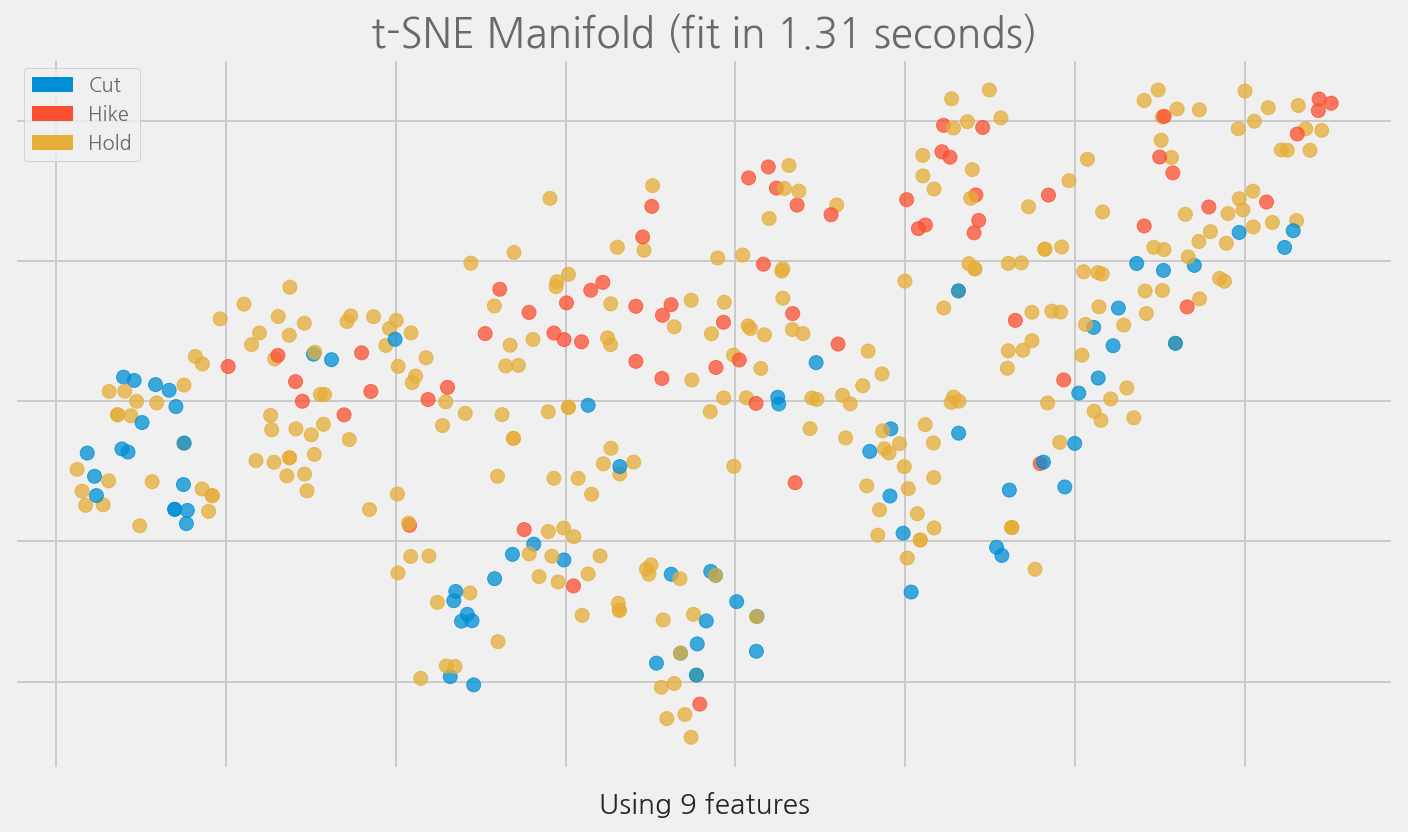

In [13]:
cfg = eKonf.compose(config_group="visualize/plot=manifold")
cfg.plots[0].x = X_cols
cfg.plots[0].y = y_col
cfg.plots[0].classes = f_small.classes
cfg.plots[0].manifold = "tsne"
cfg.figure.figsize = (10, 6)
cfg.figure.fontsize = 14
eKonf.instantiate(cfg, data=f_small.data)
